### Using the same env which is described in Part I: Escape Room Game

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import gym
from gym import spaces
# Defining RL Env (Theme: Escape Room Game)
class EscapeRoomGame(gym.Env):
    def __init__(self):
        super(EscapeRoomGame, self).__init__()

        # Defining grid size and state space
        self.grid_size = 5
        self.exit_state = (4, 4)
        self.steps_taken = 0  # Initializing step counter
        self.state_space = []
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.state_space.append((i, j))

        # Defining action space (0: Up, 1: Right, 2: Down, 3: Left)
        self.action_space = spaces.Discrete(4)

        # states and rewards
        self.observations = spaces.Discrete(len(self.state_space))
        self.rewards = {
            "key": 20,
            "door": 10,
            "step_cost": -5,
            "trap": -15,
            "exit": 50
        }

        # Defining keys, doors, traps, and exit locations of the grid
        self.keys = [(1, 1), (3, 3)]
        self.doors = [(2, 2), (4, 2)]
        self.traps = [(0, 4), (3, 1)]
        self.start_state = (0, 0)
        self.has_key = False  # it is to track if the agent has collected a key
        self.current_state = self.start_state

        # Loading images for each element (to make it interactive)
        self.agent_img = mpimg.imread('agent_idle.png')
        self.key_img = mpimg.imread('key.png')
        self.trap_img = mpimg.imread('trap.png')
        self.door_img = mpimg.imread('door.png')
        self.exit_img = mpimg.imread('exit.png')

    def step(self, action):
      self.steps_taken += 1

      # Current position
      x, y = self.current_state
      new_x, new_y = x, y

      # Checking if the action leads to a valid move within boundaries
      if action == 0 and x > 0:               # Up, only if not at top boundary
          new_x = x - 1
      elif action == 1 and y < self.grid_size - 1:  # Right, only if not at right boundary
          new_y = y + 1
      elif action == 2 and x < self.grid_size - 1:  # Down, only if not at bottom boundary
          new_x = x + 1
      elif action == 3 and y > 0:               # Left, only if not at left boundary
          new_y = y - 1

      # this keeps record whether the agent got thorugh exit or not
      goal_reached = False


      # Updating state and rewards

      # invalid moves (moves which are not allowed)

      if (new_x, new_y) == (x, y):  # If position has not changed, agent hit a boundary
          reward_points = 0  # No penalty or reward for invalid move
          status = "Boundary Hit"

      else:
          # Valid move
          self.current_state = (new_x, new_y)
          reward_points = self.rewards["step_cost"]
          status = "Moving"

          # Checking for rewards
          if self.current_state == self.exit_state:
              reward_points = self.rewards["exit"]
              status = "Reached Exit"
              goal_reached = True
          elif self.current_state in self.keys:
              reward_points = self.rewards["key"]
              self.has_key = True
              status = "Key Collected"
          elif self.current_state in self.traps:
              reward_points = self.rewards["trap"]
              status = "Hit Trap"
          elif self.current_state in self.doors and self.has_key:  #if agent has key then only open the door
              reward_points = self.rewards["door"]
              self.has_key = False
              status = "Unlocked Door"
          goal_reached = False

      # Returning state and rewards
      return self.current_state, reward_points, goal_reached, status, self.steps_taken


    def reset(self):
        self.current_state = self.start_state
        self.has_key = False
        return self.current_state

    def render(self, action=None, reward_points=None, status=""):
        # Creating the plot with extra space above the grid to print what's happening in the grid
        action_names = ["Up", "Right", "Down", "Left"]

        # formatting the text for better visualization
        bold_italic = "\033[1;3m"  # ANSCI escape codes for formatting the text
        txt_reset = "\033[0m"

        # Displaying the information above the grid which tell what action did the agent took and what happend
        print(f"📍{bold_italic} Current Agent Position:{txt_reset} {self.current_state}")

        if action is not None:
          print(f"➡️{bold_italic} Action Taken:{txt_reset} {action_names[action]}")

        if reward_points is not None:
          print(f"💰{bold_italic} Reward:{txt_reset} {reward_points}")

        print(f"📋{bold_italic} Status:{txt_reset} {status}")

        fig, axes = plt.subplots(figsize=(6, 6))

        # plot limits for the grid
        axes.set_xlim(0, self.grid_size)
        axes.set_ylim(0, self.grid_size)


        # Drawing each cell in the grid
        for x in range(self.grid_size):
            for y in range(self.grid_size):
                if (x, y) == self.current_state:
                    img = self.agent_img   # Agent
                elif (x, y) in self.keys:
                    img = self.key_img     # Key
                elif (x, y) in self.traps:
                    img = self.trap_img    # Trap
                elif (x, y) in self.doors:
                    img = self.door_img    # Door
                elif (x, y) == self.exit_state:
                    img = self.exit_img    # Exit
                else:
                    img = None

                if img is not None:
                    axes.imshow(img, extent=(y, y + 1, self.grid_size - x - 1, self.grid_size - x))
                else:
                    # Drawing an empty cell
                    axes.add_patch(patches.Rectangle((y, self.grid_size - x - 1), 1, 1, color="lightgrey"))

        # making grid border bold (using set_linewidth to increae thickness)
        for border in axes.spines.values():
          border.set_linewidth(1.5)
          border.set_edgecolor("black")

        # grid lines
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid()
        plt.show()

Starting Position: (0, 0)
Step: 1, Action: 0, New State: (0, 0), Reward: 0, Status: Boundary Hit

📍 Current Agent Position: (0, 0)
➡️ Action Taken: Up
💰 Reward: 0
📋 Status: Boundary Hit


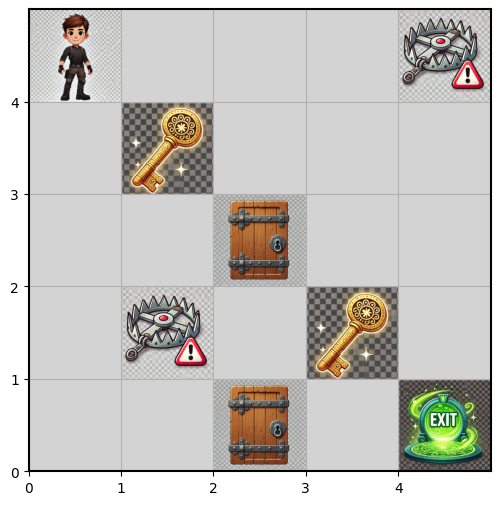

----------------------------------------------------------------------
Step: 2, Action: 1, New State: (0, 1), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 1)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


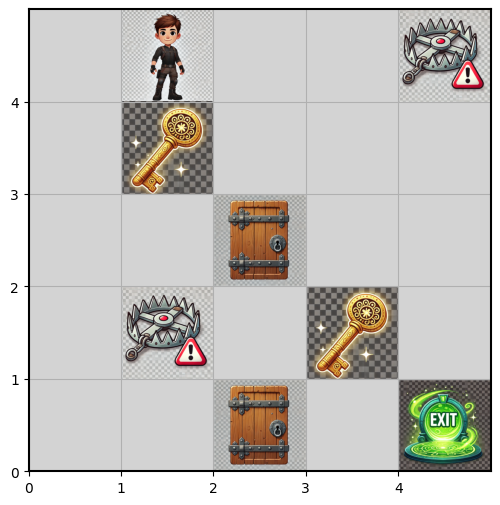

----------------------------------------------------------------------
Step: 3, Action: 1, New State: (0, 2), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 2)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


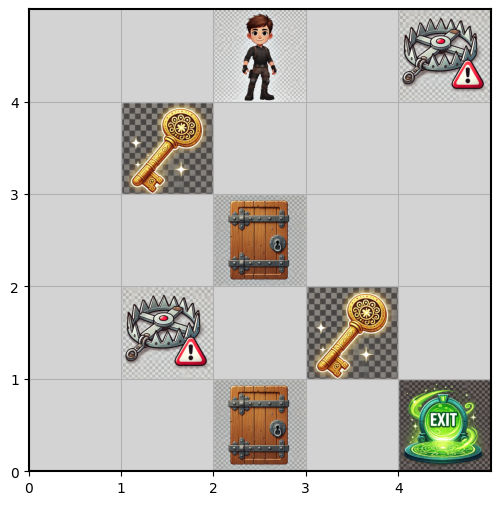

----------------------------------------------------------------------
Step: 4, Action: 1, New State: (0, 3), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 3)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


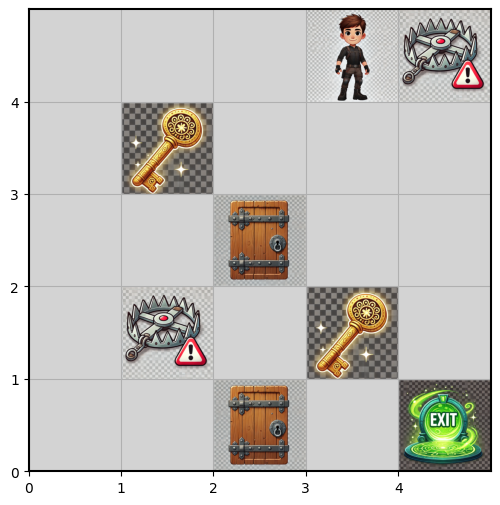

----------------------------------------------------------------------
Step: 5, Action: 2, New State: (1, 3), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 3)
➡️ Action Taken: Down
💰 Reward: -5
📋 Status: Moving


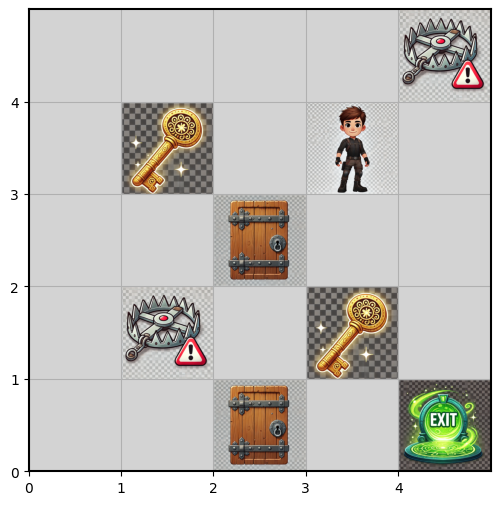

----------------------------------------------------------------------
Step: 6, Action: 3, New State: (1, 2), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 2)
➡️ Action Taken: Left
💰 Reward: -5
📋 Status: Moving


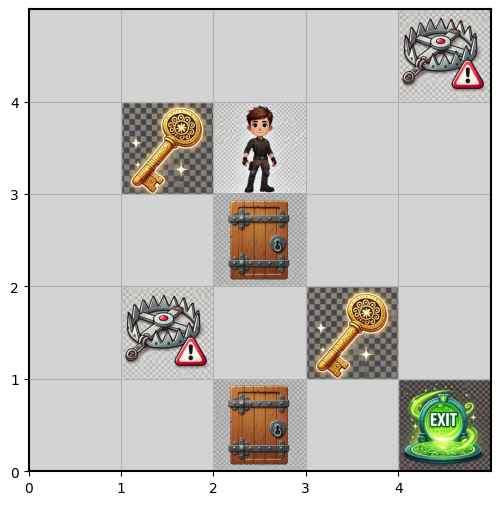

----------------------------------------------------------------------
Step: 7, Action: 0, New State: (0, 2), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 2)
➡️ Action Taken: Up
💰 Reward: -5
📋 Status: Moving


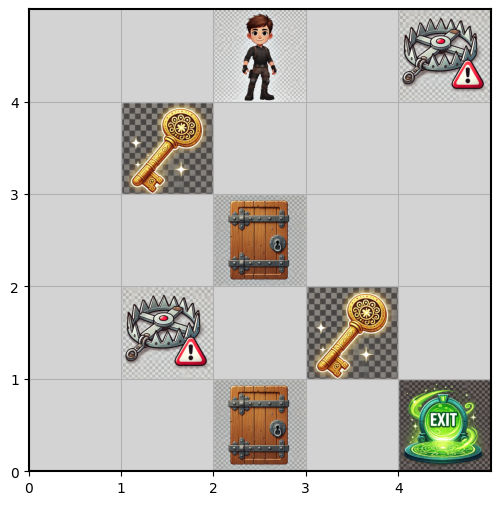

----------------------------------------------------------------------
Step: 8, Action: 3, New State: (0, 1), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 1)
➡️ Action Taken: Left
💰 Reward: -5
📋 Status: Moving


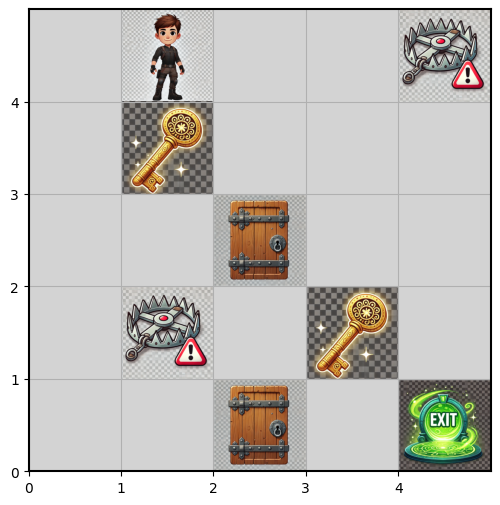

----------------------------------------------------------------------
Step: 9, Action: 1, New State: (0, 2), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 2)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


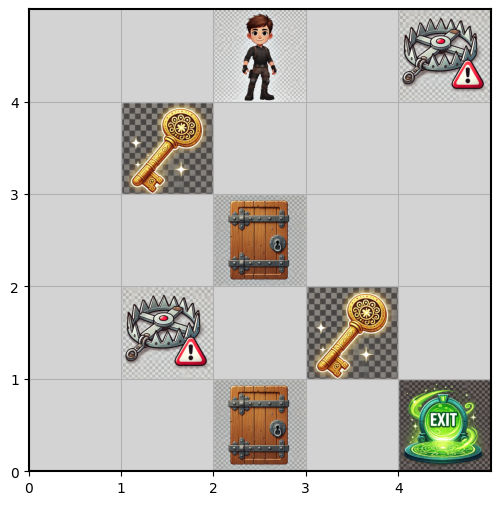

----------------------------------------------------------------------
Step: 10, Action: 1, New State: (0, 3), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 3)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


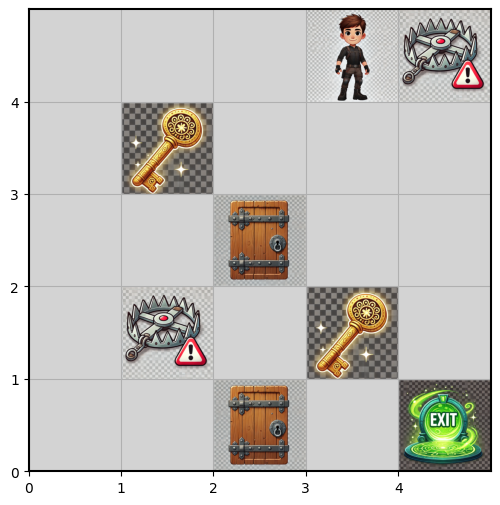

----------------------------------------------------------------------


In [ ]:
# displaying the results for 10 random timesteps
my_env = EscapeRoomGame()
state = my_env.reset()
print("Starting Position:", my_env.current_state)

for i in range(10):
  action = my_env.action_space.sample()  # Random
  new_state, reward_points, goal_reached, status, steps_taken = my_env.step(action)

  #displaying the details
  print(f"Step: {steps_taken}, Action: {action}, New State: {new_state}, Reward: {reward_points}, Status: {status}\n")

  # rendering the current state
  my_env.render(action, reward_points , status)
  # using separator line to better clarify steps from one another
  print("-" * 70)

  # checking if game is over or not
  if goal_reached:
    print("Exit reached!")
    break


In [ ]:
# ============================= PART 2 ==================================================

## Part II: Implement SARSA

**Step 1: Implementing SARSA**

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# SARSA Parameters
alpha = 0.1           # Learning rate
epsilon = 1.0         # Initial exploration rate
epsilon_decay = 0.995 # Decay rate
gamma = 0.99          # Discount factor
min_epsilon = 0.01    # Minimum epsilon for exploration
num_episodes = 1000   # Number of episodes for training
max_timesteps = 300   # Maximum steps per episode

# Initializing Q-table as a dictionary (because of tuple-based states)
Q_table = {}
for state in my_env.state_space:
  action_values = {}
  for action in range(my_env.action_space.n):
    action_values[action] = 0.0

  Q_table[state] = action_values

# Making a copy of the initial Q-table for printing it later on
initial_Q_table = {state: actions.copy() for state, actions in Q_table.items()}

# Track the total reward per episode
rewards_per_episode = []

# tacking execution time
start_time = time.time()


# SARSA Algorithm (fixed starting position)
for episode in range(num_episodes):
    # starting environment from a fixed position         (can be started with random poistion each time which may improve Generalization)
    my_env.current_state = (0,0)
    state = my_env.current_state
    total_reward = 0

    # initial action using epsilon-greedy policy
    if random.uniform(0, 1) < epsilon:
        action = my_env.action_space.sample()  # Exploring: choose a random action
    else:
        action = max(Q_table[state], key=Q_table[state].get)  # Exploitting: choose the action with the highest Q-value

    goal_reached = False
    steps_taken = 0       #step counter for each episode

    while not goal_reached and steps_taken < max_timesteps:
        # Take the next action
        next_state, reward, goal_reached, status, _ = my_env.step(action)
        total_reward += reward
        steps_taken += 1             # Increment step counter

        #using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            next_action = my_env.action_space.sample()          #Exploring
        else:
            next_action = max(Q_table[next_state], key=Q_table[next_state].get)    #Exploitting

        # SARSA Q-value update
        # Q_table[state][action] += alpha * (reward + gamma * Q_table[next_state][next_action] - Q_table[state][action])
        # Calculating the current Q-value
        current_Q_value = Q_table[state][action]

        # Calculating target Q-value
        next_Q_value = Q_table[next_state][next_action]
        target_Q_value = reward + gamma * next_Q_value

        # Computing the Q-value update (SARSA formula)
        updated_Q_value = alpha * (target_Q_value - current_Q_value)

        # Update the Q-value for the current state-action pair
        Q_table[state][action] += updated_Q_value

        # Transition to the next state and action
        state = next_state
        action = next_action

    # Decay epsilon after each episode (reducing exploration over time)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Storing the total reward for episode
    rewards_per_episode.append(total_reward)

    # Printing progress every 100 episodes
    if episode % 100 == 0:
        print(f"Episode {episode} completed with total reward: {total_reward}, epsilon: {epsilon:.4f}")
        # printing some Q-values to monitor progress
        print(f"Sample Q-value for state (0, 0) and action 0: {Q_table[(0, 0)][0]}")

# execution end time
end_time = time.time()

print(f"Training complete with Execution time: {end_time - start_time:.2f} seconds")

Episode 0 completed with total reward: -400, epsilon: 0.9950
Sample Q-value for state (0, 0) and action 0: -0.7461061529434136
Episode 100 completed with total reward: 3255, epsilon: 0.6027
Sample Q-value for state (0, 0) and action 0: 6.533094964516912
Episode 200 completed with total reward: 4260, epsilon: 0.3651
Sample Q-value for state (0, 0) and action 0: 69.02543718019166
Episode 300 completed with total reward: 4670, epsilon: 0.2212
Sample Q-value for state (0, 0) and action 0: 189.35837852711697
Episode 400 completed with total reward: 5790, epsilon: 0.1340
Sample Q-value for state (0, 0) and action 0: 243.69612043739434
Episode 500 completed with total reward: 6325, epsilon: 0.0812
Sample Q-value for state (0, 0) and action 0: 585.426597032024
Episode 600 completed with total reward: 6350, epsilon: 0.0492
Sample Q-value for state (0, 0) and action 0: 757.324493977114
Episode 700 completed with total reward: 6490, epsilon: 0.0298
Sample Q-value for state (0, 0) and action 0: 96

### Step 2:
**a. Printing Initial and Trained Q-Table**

In [ ]:
#Printing Initial and Trained Q-Table
print("\n Initial   Q-Table:")

for state, actions in initial_Q_table.items():
    print(f"State {state}: {actions}")


print("\nTrained Q- Table:")

for state, actions in Q_table.items():
    print(f"State {state}: {actions}")


 Initial   Q-Table:
State (0, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (4, 0): {0: 0.0, 1: 0.0, 2: 0.0, 

**b. Plotting Total Reward per Episode**

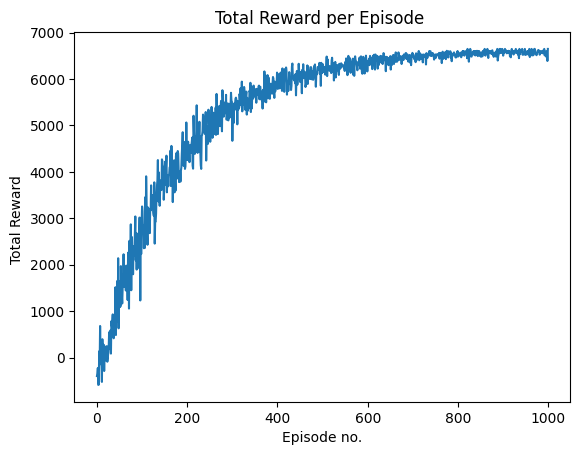

In [ ]:

import matplotlib.pyplot as plt

# here we Plot the total rewards per episode to observe learning progress
plt.plot(range(num_episodes), rewards_per_episode)
plt.xlabel("Episode no.")
plt.ylabel("Total Reward ")
plt.title("Total Reward per Episode ")
plt.show()


**c. Plot Epsilon Decay**

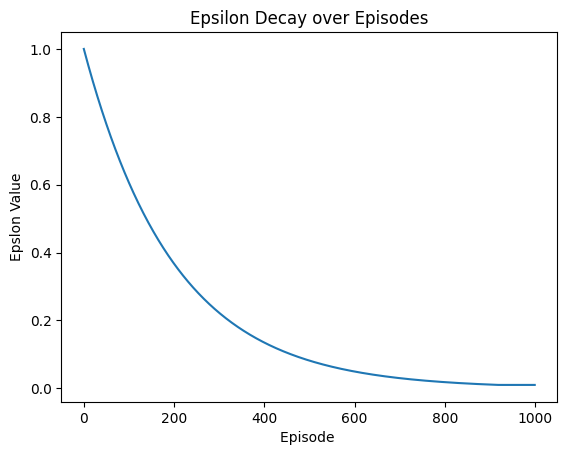

In [ ]:
# Tracking  epsilon values over episodes

epsilon_values = []
epsilon_current = 1.0  # Initial epsilon

for episode in range(num_episodes):
    epsilon_values.append(epsilon_current)

    epsilon_current = max(min_epsilon, epsilon_current * epsilon_decay)

#  epsilon decay over episodes
plt.plot(range(num_episodes), epsilon_values)
plt.xlabel("Episode ")
plt.ylabel("Epslon Value")
plt.title("Epsilon Decay over Episodes")
plt.show()

**d. Greedy Policy Evaluation**

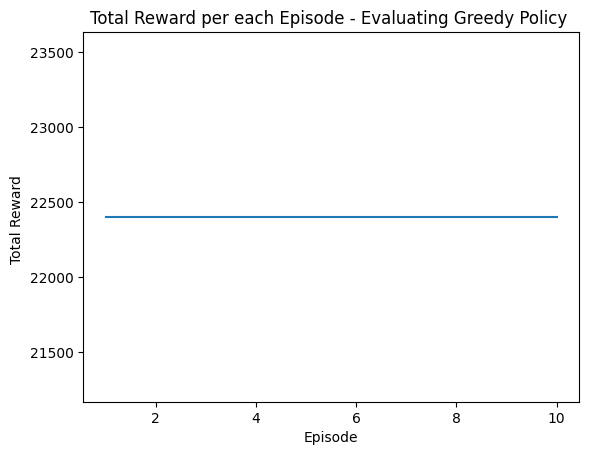

In [ ]:
# Greedy policy evaluation with new starting points
greedyRewards = []
for episode in range(10):
    my_env.current_state = (0,0)
    state = my_env.current_state
    total_reward = 0
    goal_reached = False
    steps_taken = 0

    while not goal_reached and steps_taken < max_timesteps:

        action = max(Q_table[state], key=Q_table[state].get)    # Choosing the action with the highest Q-value
        next_state, reward, goal_reached, status, _ = my_env.step(action)   # Taking action to observe the next state and reward

        total_reward += reward
        state = next_state
        steps_taken += 1

    greedyRewards.append(total_reward)

# Plotting the total reward per episode for the greedy policy
plt.plot(range(1, 11), greedyRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward ")
plt.title("Total Reward per each Episode - Evaluating Greedy Policy")
plt.show()


### Step 3: Hyperparameter tuning.

1.   Discount Factor (γ)
2.   Epsilon Decay Rate


Initial Q-Table for  Gamma: 0.9, Epsilon Decay: 0.99
State (0, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State 

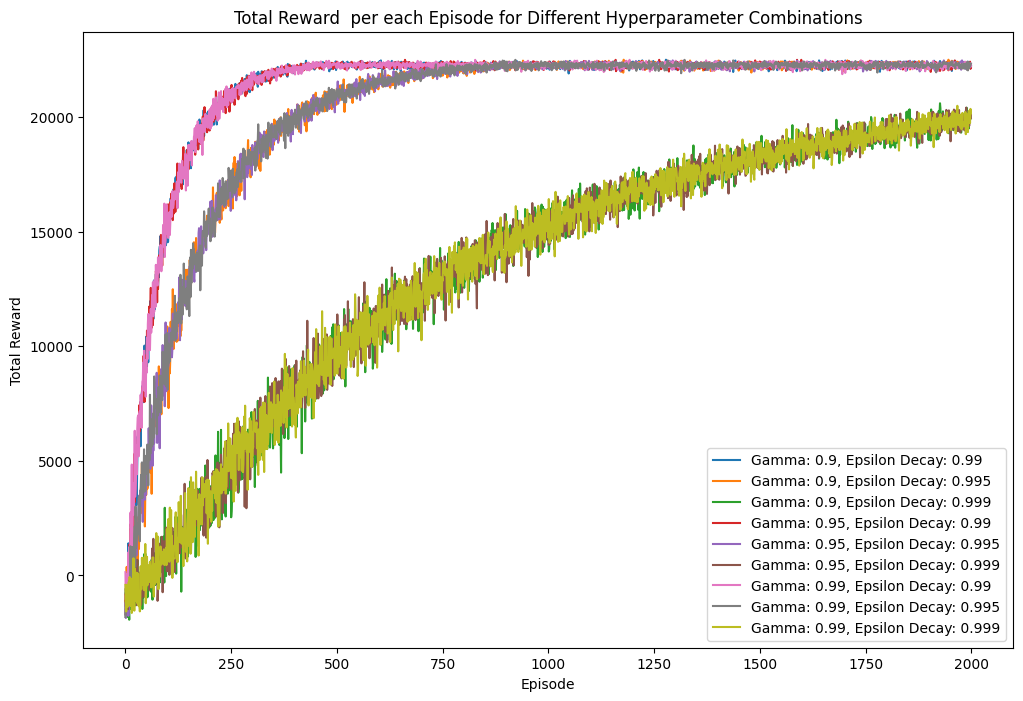

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random

# hyperparameters
gammaValues = [0.9, 0.95, 0.99]       # Different discount factors
epsilon_decay_values = [0.99, 0.995, 0.999]  # Different epsilon decay rates
alpha = 0.1          # Fixed learning rate
min_epsilon = 0.01   # Minimum epsilon
num_episodes = 2000  # Reduced for faster tuning
max_timesteps = 1000  # Maximum steps per episode

# Storing results for comparison
tuning_results = {}

# Starting time of execution
start_time = time.time()

# tuning Hyperparameters
for gamma in gammaValues:
    for epsilon_decay in epsilon_decay_values:

        q_table = {} # Initializing Q-table as a dictionary for tuple-based states
        for state in my_env.state_space:

            q_table[state] = {action: 0.0 for action in range(my_env.action_space.n)}

        initial_q_table = {state: actions.copy() for state, actions in q_table.items()}  # Making a copy of the initial Q-table for printing later

        rewards_per_episode = []
        epsilon = 1.0  # Resetting epsilon for each combination

        for episode in range(num_episodes):
            my_env.current_state = random.choice(my_env.state_space)  # Start with a random state
            state = my_env.current_state
            total_reward = 0

            if random.uniform(0, 1) < epsilon:  # Choose the initial action using epsilon-greedy policy
                action = my_env.action_space.sample()  # Exploring
            else:
                action = max(q_table[state], key=q_table[state].get)  # Exploiting

            done = False

            steps_taken = 0

            while not done and steps_taken < max_timesteps:
                next_state, reward, done, status, _ = my_env.step(action)    # Taking the chosen action and observing the next state and reward
                total_reward += reward
                steps_taken += 1

                if next_state not in q_table:  # Initializing the Q-values for new states if needed
                    q_table[next_state] = {action: 0.0 for action in range(my_env.action_space.n)}

                # Choosing the next action using epsilon-greedy policy
                if random.uniform(0, 1) < epsilon:
                    next_action = my_env.action_space.sample()  # Explore
                else:
                    next_action = max(q_table[next_state], key=q_table[next_state].get)  # Exploit

                q_table[state][action] += alpha * (reward + gamma * q_table[next_state][next_action] - q_table[state][action])     # SARSA Q-val update


                state = next_state   # Transitioning to the next state and action
                action = next_action


            epsilon = max(min_epsilon, epsilon * epsilon_decay)   # Decaying epsilon after each episode

            rewards_per_episode.append(total_reward)    # Storing the total reward for this episode

        tuning_results[(gamma, epsilon_decay)] = rewards_per_episode  # Storing the result for this combination of gamma and epsilon decay

        print(f"\nInitial Q-Table for  Gamma: {gamma}, Epsilon Decay: {epsilon_decay}") # Printing the initial Q-table for this combination
        for state, actions in initial_q_table.items():
            print(f"State {state}: {actions}")

        # Printing the trained Q-table for this combination
        print(f"\nTrained Q-Table  for Gamma: {gamma}, Epslon Decay: {epsilon_decay}")
        for state, actions in q_table.items():
            print(f"State {state}: {actions}")

# End time of the execution
end_time = time.time()
print(f"Hyperparameter tuning completed. Execution time: {end_time - start_time:.2f} seconds")

# Plot results for comparison
plt.figure(figsize=(12, 8))
for (gamma, epsilon_decay), rewards in tuning_results.items():
    plt.plot(rewards, label=f"Gamma: {gamma}, Epsilon Decay: {epsilon_decay}")

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward  per each Episode for Different Hyperparameter Combinations")
plt.legend()
plt.show()


In [ ]:

# Most Efficient Hyperparameter Combination
# From observing the graph, the most efficient combination appears to be:

# Gamma (Discount Factor): 0.99
# Epsilon Decay Rate: 0.99

**4. Combining the parameters that are giving the best results:
Most Efficient Hyperparameter Combination
From observing the graph, the most efficient combination appears to be:
 Gamma (Discount Factor): 0.99
Epsilon Decay Rate: 0.99**

In [ ]:
# best model (gamma = 0.99 & epsilon_decay = 0.99)

# SARSA Parameters
alpha = 0.1           # Learning rate
epsilon = 1.0         # Intial exploration rate
epsilon_decay = 0.99  # Decay rate
gamma = 0.99          # Discount factor
min_epsilon = 0.01    # Minimum epsilon for exploration
num_episodes = 1000   # Number of episodes for training
max_timesteps = 300   # Maximum steps per episode

# Initializing Q-table as a dictionary for tuple-based states
q_table = {}
for state in my_env.state_space:
    q_table[state] = {action: 0.0 for action in range(my_env.action_space.n)}

initial_q_table = {state: actions.copy() for state, actions in q_table.items()} # Making copy of the initial Q-table for printing later

rewards_per_episode = [] # Tracking total reward per episode

# Starting time of execution
start_time = time.time()

# SARSA Algorithm with Random Starting Positions
for episode in range(num_episodes):
    # Resetting the environment to a random starting position
    my_env.current_state = random.choice(my_env.state_space)  # Randomly choose a starting state for better generalisation

    state = my_env.current_state
    total_reward = 0

    # Choosing the initial action using epsilon-greedy policy
    if random.uniform(0, 1) < epsilon:
        action = my_env.action_space.sample()  # choosing a random action
    else:
        action = max(q_table[state], key=q_table[state].get)  # Exploiting: choosing the action with the highest Q-value

    goal_reached = False
    steps_taken = 0  # Initializing step counter for each episode
    while not goal_reached and steps_taken < max_timesteps:
        # Taking the chosen action, observe the next state and reward
        next_state, reward, goal_reached, status, _ = my_env.step(action)
        total_reward += reward
        steps_taken += 1  # Increment step counter


        if random.uniform(0, 1) < epsilon:  # Choosing the next action using epsilon-greedy policy
            next_action = my_env.action_space.sample()  # Explore: choosing random action
        else:
            next_action = max(q_table[next_state], key=q_table[next_state].get)  # Exploiting: choosing best action


        q_table[state][action] += alpha * (reward + gamma * q_table[next_state][next_action] - q_table[state][action])  # SARSA Q-value update


        state = next_state   # Transitioning to the next state and action
        action = next_action

    # Decay epsilon after each episode to reduce exploration over time
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Store the total reward for this episode
    rewards_per_episode.append(total_reward)

    #  progress after every 100 episodes
    if episode % 100 == 0:
        print(f"Episode {episode} completed with total reward: {total_reward}, epsilon: {epsilon:.4f}")

        print(f"Sample Q-value for state (0, 0) and action 0: {q_table[(0, 0)][0]}")



Episode 0 completed with total reward: -370, epsilon: 0.9900
Sample Q-value for state (0, 0) and action 0: -0.18922854700494407
Episode 100 completed with total reward: 4355, epsilon: 0.3624
Sample Q-value for state (0, 0) and action 0: -4.1053257856100736
Episode 200 completed with total reward: 5580, epsilon: 0.1326
Sample Q-value for state (0, 0) and action 0: -4.1053257856100736
Episode 300 completed with total reward: 6395, epsilon: 0.0486
Sample Q-value for state (0, 0) and action 0: -4.1053257856100736
Episode 400 completed with total reward: 6575, epsilon: 0.0178
Sample Q-value for state (0, 0) and action 0: -4.1053257856100736
Episode 500 completed with total reward: 6595, epsilon: 0.0100
Sample Q-value for state (0, 0) and action 0: -4.1053257856100736
Episode 600 completed with total reward: 6630, epsilon: 0.0100
Sample Q-value for state (0, 0) and action 0: -4.1053257856100736
Episode 700 completed with total reward: 6600, epsilon: 0.0100
Sample Q-value for state (0, 0) and

In [ ]:
# Printing initial Q-table

print("\nInitial Q-Table:")
for state, actions in initial_q_table.items():
    print(f"State {state}: {actions}")

# Printing trained Q-table

print("\nTrained Q-Table:")

for state, actions in q_table.items():
    print(f"State {state}: {actions}")


Initial Q-Table:
State (0, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (0, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (1, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (2, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (3, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
State (4, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 

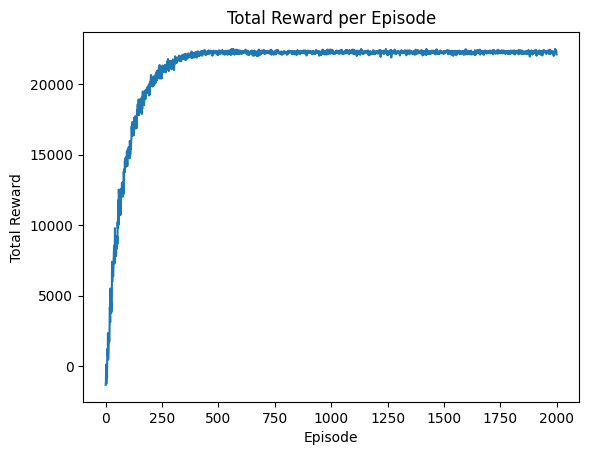

In [ ]:
# Plotting rewards per episode to see training progress
plt.plot(rewards_per_episode)

plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.title("Total Reward per Episode")
plt.show()

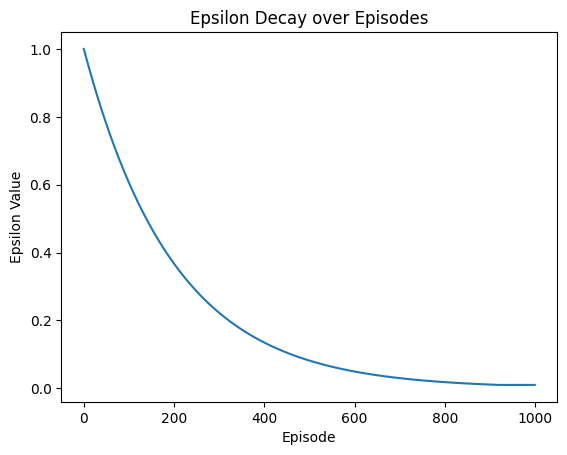

In [ ]:
# Tracking epsilon values over episodes for plotting
epsilon_values = []
current_epsilon = 1.0  # Initial epsilon value

for ep in range(num_episodes):
    epsilon_values.append(current_epsilon)
    current_epsilon = max(min_epsilon, current_epsilon * epsilon_decay)

# Plotting epsilon decay over episodes
plt.plot(range(num_episodes), epsilon_values)
plt.xlabel("Episode")
plt.ylabel("Epsilon Value")
plt.title("Epsilon Decay over Episodes")
plt.show()

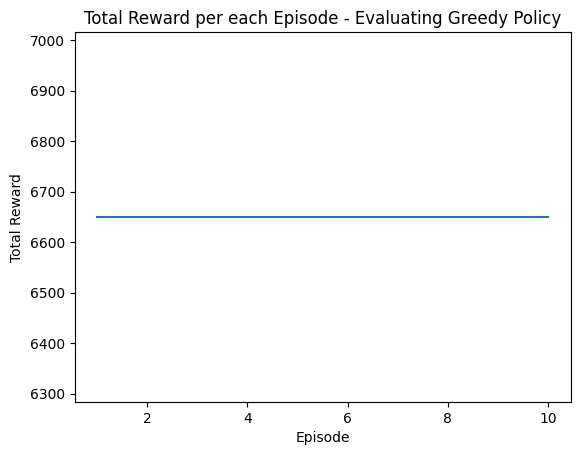

In [ ]:
# Greedy policy evaluation
greedy_rewards = []
for episode in range(10):

    my_env.current_state = (0,0)
    state = my_env.current_state
    total_reward = 0
    goal_reached = False
    steps_taken = 0

    while not goal_reached and steps_taken < max_timesteps:

        action = max(Q_table[state], key=Q_table[state].get) # Choosing the action with the highest Q-value (greedy action)

        next_state, reward, goal_reached, status, _ = my_env.step(action) # Taking the action, observe the next state and reward

        total_reward += reward
        state = next_state
        steps_taken += 1

    greedy_rewards.append(total_reward)

# Plotting the total reward per episode
plt.plot(range(1, 11), greedy_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per each Episode - Evaluating Greedy Policy")
plt.show()


### References

1. **OpenAI Gym Documentation**  
   [https://www.gymlibrary.dev/](https://www.gymlibrary.dev/)

2. **NumPy Documentation**  
   [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)

3. **Matplotlib Documentation**  
   [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)

4. **Python Random Module Documentation**  
   [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html)

5. **Python Time Module Documentation**  
   [https://docs.python.org/3/library/time.html](https://docs.python.org/3/library/time.html)

6. **Reinforcement Learning Introduction**  
   [https://spinningup.openai.com/en/latest/spinningup/rl_intro.html](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html)

7. **Python Dictionary Documentation**  
   [https://docs.python.org/3/tutorial/datastructures.html#dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)